In [3]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import seaborn as sns
import time
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


# Pytorch device specific configuration
# Pytorch Gpu Configuration
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# For Directml Gpu Configurations
import torch_directml
device = torch_directml.device()

# Set default device
torch.set_default_device(device)

# # Font update global for all plots
# plt.rcParams.update({"font.size": 18})

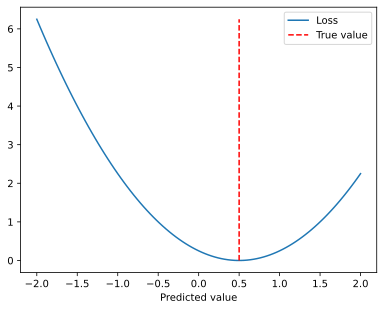

In [5]:
# Loss Function
lossFunMSE = nn.MSELoss()

# Create Predictions and real answer
yHat = torch.linspace(-2, 2, 101)
y = torch.tensor(0.5)

# Compute the MSE loss function
L = np.zeros(101)
for i, yy in enumerate(yHat):
    L[i] = lossFunMSE(yy, y)

plt.plot(yHat.cpu(), L, label="Loss")
plt.plot([y.cpu(), y.cpu()], [0, np.max(L)], "r--", label="True value")
plt.xlabel("Predicted value")
plt.legend()
plt.show()